#Библиотеки Python для DS (семинары)

##Урок 4. Практическая работа. Построение модели бинарной классификации

Задание
Используя diabetes-dataset, выполните следующие шаги:

Предварительная обработка данных:

* Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
* Разделите датасет на обучающую и тестовую выборки.


Построение модели:
* Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
* Обучите модель на обучающем наборе данных.

Оценка модели:

* Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

Интерпретация результатов:
* Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.
* Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.

###Загрузка библиотек

In [12]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

###Первичный анализ

In [2]:
df = pd.read_csv('/content/diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


* Pregnancies (Беременности): Количество раз, когда женщина была беременна. Это
целочисленное значение.
* Glucose (Глюкоза): Уровень глюкозы в плазме крови после двухчасового теста, измеряется в mg/dL (миллиграмм на децилитр).
* BloodPressure (Кровяное давление): Диастолическое артериальное давление (мм рт. ст.), значение указано в миллиметрах ртутного столба.
* SkinThickness (Толщина кожной складки): Толщина жировой складки на трицепсе в миллиметрах.
* Insulin (Инсулин): Уровень инсулина в сыворотке крови, измеряется в микроединицах на миллилитр (µU/mL).
* BMI (Индекс массы тела, или ИМТ): Индекс массы тела, рассчитывается как вес в килограммах, деленный на квадрат роста в метрах (кг/м²).
* DiabetesPedigreeFunction (Функция родословного дерева диабета): Оценка вероятности диабета на основе семейной истории, безразмерное значение.
* Age (Возраст): Возраст пациента в годах.
* Outcome (Исход): Целевой параметр, показывающий наличие (1) или отсутствие (0) диабета у пациента.






In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


* Датасет состоит из 2000 записей (строк).
* Всего 9 столбцов с данными.
* Нет пропусков в данном совокупности данных, то есть у каждого из 2000 записей присутствуют значения во всех 9 столбцах.

7 столбцов имеют тип данных int64 (целые числа):

* Pregnancies (количество беременностей)
* Glucose (уровень глюкозы)
* BloodPressure (кровяное давление)
* SkinThickness (толщина кожной складки)
* Insulin (уровень инсулина)
* Age (возраст)
* Outcome (исход: наличие или отсутствие диабета)

2 столбца имеют тип данных float64 (числа с плавающей запятой):

* BMI (индекс массы тела)
* DiabetesPedigreeFunction (функция родословного дерева диабета)

Датасет достаточно чистый и хорошо структурированный, что облегчает его дальнейшую обработку и анализ.

In [4]:
df.describe(include="all").T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2000.0,121.18,32.07,0.00,99.00,117.00,141.00,199.00
BloodPressure,2000.0,69.15,19.19,0.00,63.50,72.00,80.00,122.00
SkinThickness,2000.0,20.94,16.10,0.00,0.00,23.00,32.00,110.00
Insulin,2000.0,80.25,111.18,0.00,0.00,40.00,130.00,744.00
BMI,2000.0,32.19,8.15,0.00,27.38,32.30,36.80,80.60
DiabetesPedigreeFunction,2000.0,0.47,0.32,0.08,0.24,0.38,0.62,2.42
Age,2000.0,33.09,11.79,21.00,24.00,29.00,40.00,81.00
Outcome,2000.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00


Pregnancies (Беременности):

* Среднее количество беременностей у женщин составляет около 3.7.
* Стандартное отклонение (среднее отклонение от среднего) равно 3.31, что говорит о значительной вариации.
* Минимальное значение 0 и максимальное 17 указывают на широкий разброс по количеству беременностей. Возможно выброс.

Glucose (Глюкоза):

* Средний уровень глюкозы составляет 121.18 мг/дл, с большим стандартным отклонением в 32.07, что указывает на значительное разнообразие в данных.
* Минимальное значение 0 указывает на возможные пропуски или ошибочные данные, так как невозможно, чтобы уровень глюкозы был равен нулю в нормальных условиях.

BloodPressure (Кровяное давление):

* Среднее давление составляет 69.15 мм рт. ст., что является близким к нормальному диапазону.
* Минимальное значение 0 также указывает на пропущенные или неверные данные, так как давление не может быть нулевым у живого человека.

SkinThickness (Толщина кожной складки):

* Среднее значение составляет 20.94 мм с равномерным отклонением, что свидетельствует о разнообразии данных.
* Минимальное значение 0 также подозрительно и указывает на возможные пропущенные значения.

Insulin (Инсулин):

* Среднее значение уровня инсулина составляет 80.25 мкЕд/мл, причем стандартное отклонение очень высокое (111.18), что указывает на большой разброс данных.
* Минимальное значение 0 снова подозрительно, так как уровень инсулина не может быть нулевым у здорового человека.

BMI (Индекс массы тела):

* Средний ИМТ составляет 32.19, что указывает на возможность наличия избыточного веса или ожирения у большинства пациентов в совокупности данных.
* Существуют также аномальные значения, как минимум 0, что не является возможным значением ИМТ.

DiabetesPedigreeFunction (Функция родословного дерева диабета):

* Среднее значение — 0.47.
* Стандартное отклонение — 0.33.
* Нет подозрительных значений.

Age (Возраст):

* Средний возраст — 33 года.
* Стандартное отклонение — 11.79 указывает на широкий выбор по возросту

<Axes: ylabel='Diabet'>

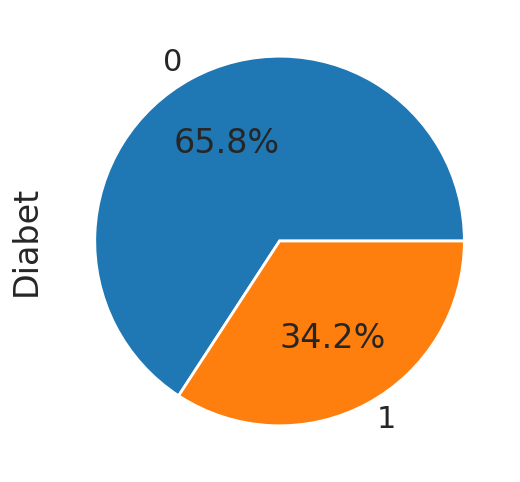

In [5]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Diabet",
                                       autopct='%1.1f%%')

Наблюдаем ситуацию дисбаланса классов в данных. С долей 65.8% участников, не имеющих диабет (класс "0"), и 34.2% участников, имеющих диабет (класс "1"), ясно, что данный набор данных имеет низкое представительство одного из классов по сравнению с другим.

###Предварительная обработка данных:

####Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.

In [6]:
# Заменим нулевые значения медианными
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median = df[column].median()
    df[column] = df[column].replace(0, median)
df.describe(include="all").T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2000.0,121.94,30.54,44.00,99.00,117.00,141.00,199.00
BloodPressure,2000.0,72.39,11.95,24.00,64.00,72.00,80.00,122.00
SkinThickness,2000.0,27.52,9.56,7.00,23.00,23.00,32.00,110.00
Insulin,2000.0,99.37,98.44,14.00,40.00,40.00,130.00,744.00
BMI,2000.0,32.65,7.19,18.20,27.60,32.30,36.80,80.60
DiabetesPedigreeFunction,2000.0,0.47,0.32,0.08,0.24,0.38,0.62,2.42
Age,2000.0,33.09,11.79,21.00,24.00,29.00,40.00,81.00
Outcome,2000.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00


In [45]:
# Нормализация данных
features = df.drop('Outcome', axis=1)
target = df['Outcome']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [48]:
feature_names = features.columns
coefficients = model.coef_[0]

# Связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# Преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# Отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

Pregnancies: 0.40277164178449426
Glucose: 1.1449885799856674
BloodPressure: -0.06353451569966084
SkinThickness: 0.09559095830013767
Insulin: -0.19632094307874157
BMI: 0.5532871042356224
DiabetesPedigreeFunction: 0.2121944938185915
Age: 0.10882990349515474


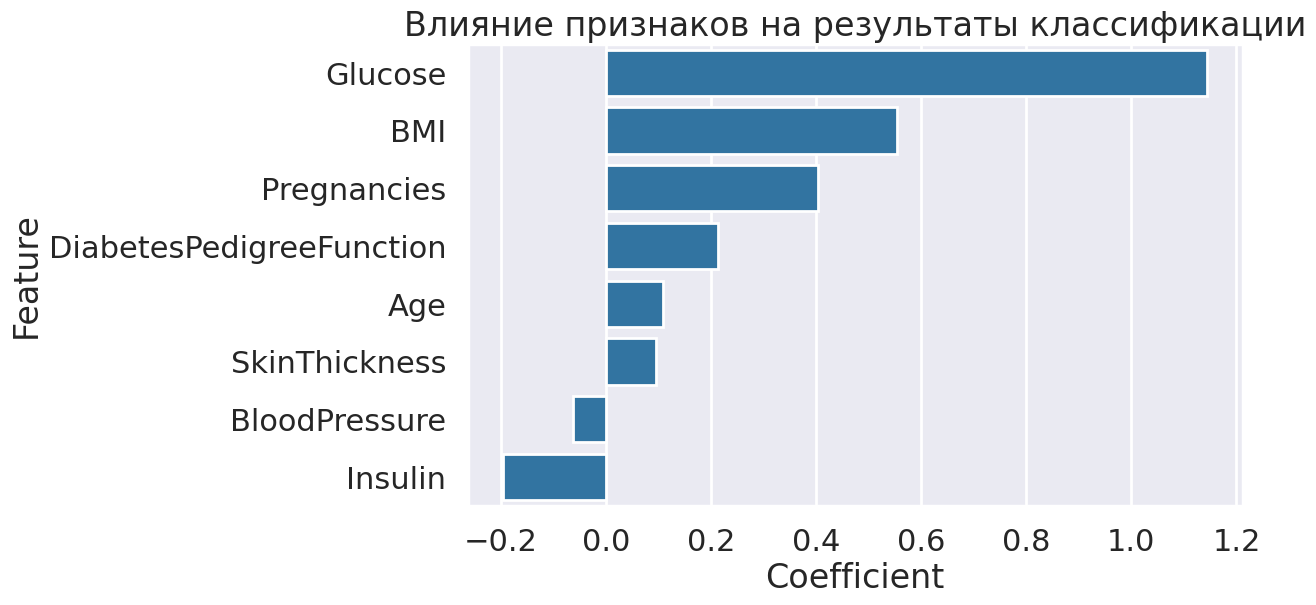

In [50]:
# Визуализация значимости признаков
features = df.columns[:-1]
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Влияние признаков на результаты классификации')
plt.show()


Выводы по коэффициентам логистической регрессии:


Беременность:

* Коэффициент 0.4028 является положительным и статистически значимым.
Это означает, что с каждой дополнительной беременностью вероятность развития диабета увеличивается.


Глюкоза:

* Коэффициент 1.1450 является положительным и статистически значимым.
Это означает, что с каждым пунктом увеличения уровня глюкозы в крови вероятность развития диабета сильно увеличивается.


Кровяное давление:

* Коэффициент -0.0635 является отрицательным и статистически значимым.
Это означает, что с каждым пунктом увеличения кровяного давления вероятность развития диабета снижается.


Толщина кожной складки:

* Коэффициент 0.0956 является положительным и статистически значимым.
Это означает, что с каждым миллиметром увеличения толщины кожной складки вероятность развития диабета увеличивается.

Инсулин:

* Коэффициент -0.1963 является отрицательным и статистически значимым.
Это означает, что с каждым пунктом увеличения уровня инсулина в крови вероятность развития диабета снижается.


Индекс массы тела (ИМТ):

* Коэффициент 0.5533 является положительным и статистически значимым.
Это означает, что с каждым пунктом увеличения ИМТ вероятность развития диабета увеличивается.


Функция родословной диабета:

* Коэффициент 0.2122 является положительным и статистически значимым.
Это означает, что с каждым пунктом увеличения функции родословной диабета вероятность развития диабета увеличивается.


Возраст:

* Коэффициент 0.1088 является положительным и статистически значимым.
Это означает, что с каждым годом вероятность развития диабета увеличивается.

###Разделите датасет на обучающую и тестовую выборки.

In [46]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

##Построение модели:

###Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.

In [47]:
# Создание модели логистической регрессии
model = LogisticRegression()

array([[ 0.40277164,  1.14498858, -0.06353452,  0.09559096, -0.19632094,
         0.5532871 ,  0.21219449,  0.1088299 ]])

###Обучите модель на обучающем наборе данных.

In [ ]:
# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# После обучения модели можно получить коэффициенты\
model.coef_

##Оценка модели:

###Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [18]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Точность:", accuracy)
print("Отчет классификации:\n", report)
print("Матрица ошибок:\n", conf_matrix)

Точность: 0.775
Отчет классификации:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       253
           1       0.78      0.54      0.64       147

    accuracy                           0.78       400
   macro avg       0.78      0.73      0.74       400
weighted avg       0.78      0.78      0.76       400

Матрица ошибок:
 [[231  22]
 [ 68  79]]


##Интерпретация результатов:

###Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.

**Выводы:**


Precision (Точность):

* Для класса 0: 0.77
* Для класса 1: 0.78
 * Точность показывает долю правильно предсказанных положительных результатов среди всех предсказанных положительных результатов. Значения примерно одинаковы для обоих классов, что указывает на хорошую способность модели избегать ложных срабатываний.


Recall (Полнота):

* Для класса 0: 0.91
* Для класса 1: 0.54
 * Полнота показывает долю правильно предсказанных положительных результатов среди всех истинных положительных результатов. Полнота для класса 0 значительно выше, чем для класса 1. Это означает, что модель лучше распознает отрицательные случаи, чем положительные.


F1-Score:

* Для класса 0: 0.84
* Для класса 1: 0.64
 * F1-Score является гармоническим средним между точностью и полнотой. Высокий F1-Score для класса 0 и средний для класса 1 показывает, что модель лучше сбалансирована для класса 0.


Accuracy (Точность):

* Общая точность модели составляет 0.78, что означает, что 78% всех предсказаний были правильными.

Матрица ошибок:

* Класс 0: 231 правильно предсказанных, 22 неправильно предсказанных.
* Класс 1: 79 правильно предсказанных, 68 неправильно предсказанных.
 * Модель имеет больше ошибок второго рода (ложных отрицаний) для класса 1, что также подтверждается низкой полнотой для этого класса.


**Вывод:**


Модель показывает хорошую точность и сбалансированную производительность для класса 0 (отсутствие диабета), но она менее эффективна для класса 1 (есть диабет). Это может быть связано с дисбалансом в данных или сложностью распознавания положительных случаев.

###Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.

* Глюкоза (Glucose): Наиболее значимый признак, влияющий на предсказание наличия диабета.
* BMI: Второй по значимости признак.
* Число беременностей (Pregnancies) и функция родословной диабета (DiabetesPedigreeFunction) также имеют значительное влияние.
* Признаки инсулин (Insulin) и артериальное давление (BloodPressure) имеют отрицательные коэффициенты, что может указывать на их негативное влияние на предсказание.